xgboost


In [6]:

import numpy as np 
import pandas as pd 
import seaborn as sb
import xgboost as xgb


from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [7]:

train = pd.read_csv("D:\\train.csv")
test = pd.read_csv("D:\\test.csv")

<AxesSubplot:>

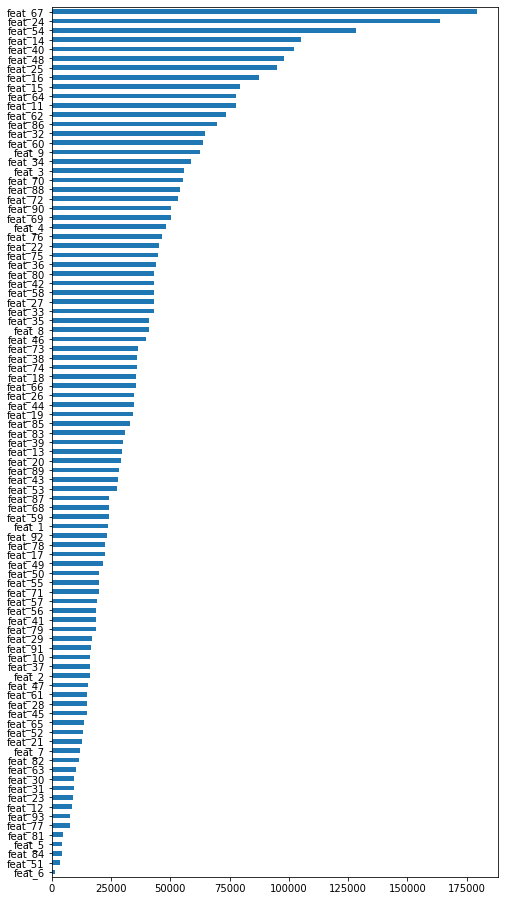

In [8]:
#sum features
featuresSum = train.sum()
#print(featuresSum)
#print(type(train))
#plot the sum of features in desceding order
featuresSum.drop(['target', 'id']).sort_values().plot(kind='barh', figsize=(8,16))

<AxesSubplot:xlabel='target', ylabel='count'>

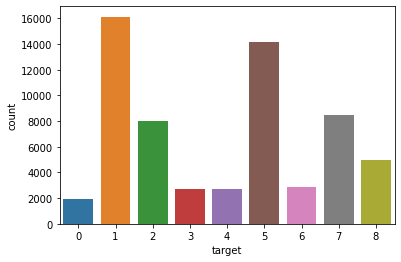

In [9]:
#Clases are String like "Class_1" => we map them as numbers from 0-8 (9 classes)

class_range = range(1, 10)
class_dict = {}

for n in class_range:
    class_dict['Class_{}'.format(n)] = n-1

#print(class_dict)
#print(train.head())
train['target'] = train['target'].map(class_dict)
#print(train['target'].head())

#next we plot the count for each class unsing seaborn libary
sb.countplot(x='target', data= train)

In [13]:
#next we create training and testing sets
X_train = train.drop(["id", "target"], axis=1)
Y_train = train["target"].copy()
X_test = test.drop("id", axis = 1).copy()
print(Y_train)

0        0
1        0
2        0
3        0
4        0
        ..
61873    8
61874    8
61875    8
61876    8
61877    8
Name: target, Length: 61878, dtype: int64


In [11]:
# we use the training and test sets to make a prediction based on Boosted Trees => library XgBoost
# http://xgboost.readthedocs.io/en/latest/model.html

params = {"objective": "multi:softprob", "eval_metric":"mlogloss", "num_class": 9}

T_train_xgb = xgb.DMatrix(X_train, Y_train)
X_test_xgb  = xgb.DMatrix(X_test)

#number of iterations - initial 20, 
gbm = xgb.train(params, T_train_xgb, 180)
Y_pred = gbm.predict(X_test_xgb)

[[8.19879060e-05 1.43411577e-01 1.05132334e-01 ... 1.69007119e-03
  1.39853044e-04 7.55329893e-06]
 [1.46794843e-03 1.18049476e-02 4.44464997e-04 ... 2.00705999e-03
  4.48592067e-01 2.24685110e-03]
 [4.63020660e-06 1.57680358e-06 3.22547703e-06 ... 8.09372796e-06
  9.99531709e-04 2.02145702e-06]
 ...
 [5.20635112e-05 7.20703423e-01 2.25946888e-01 ... 6.40217797e-04
  2.33746596e-05 1.13985880e-06]
 [1.68258248e-05 2.06707239e-01 8.98563024e-03 ... 3.87089560e-04
  1.77035179e-06 4.97070278e-06]
 [2.77755113e-04 5.55772603e-01 3.69958937e-01 ... 4.34724465e-02
  5.71103374e-05 2.38109915e-05]]


In [12]:
#Make a submission based on model "sample_submission.csv"

submission = pd.DataFrame({ "id": test["id"]})

i = 0

for num in class_range:
    col_name = str("Class_{}".format(num))
    submission[col_name] = Y_pred[:,i]
    i = i + 1
    
submission.to_csv('/home/amal/Bureau/otto2.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: '/home/amal/Bureau/otto2.csv'